In [1]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
file = r'C:\Users\anirb\IISC questions\cifar10\cifar-10-batches-py\data_batch_1'

In [4]:
batch_1= unpickle(file)
batch_1

{b'batch_label': b'training batch 1 of 5',
 b'labels': [6,
  9,
  9,
  4,
  1,
  1,
  2,
  7,
  8,
  3,
  4,
  7,
  7,
  2,
  9,
  9,
  9,
  3,
  2,
  6,
  4,
  3,
  6,
  6,
  2,
  6,
  3,
  5,
  4,
  0,
  0,
  9,
  1,
  3,
  4,
  0,
  3,
  7,
  3,
  3,
  5,
  2,
  2,
  7,
  1,
  1,
  1,
  2,
  2,
  0,
  9,
  5,
  7,
  9,
  2,
  2,
  5,
  2,
  4,
  3,
  1,
  1,
  8,
  2,
  1,
  1,
  4,
  9,
  7,
  8,
  5,
  9,
  6,
  7,
  3,
  1,
  9,
  0,
  3,
  1,
  3,
  5,
  4,
  5,
  7,
  7,
  4,
  7,
  9,
  4,
  2,
  3,
  8,
  0,
  1,
  6,
  1,
  1,
  4,
  1,
  8,
  3,
  9,
  6,
  6,
  1,
  8,
  5,
  2,
  9,
  9,
  8,
  1,
  7,
  7,
  0,
  0,
  6,
  9,
  1,
  2,
  2,
  9,
  2,
  6,
  6,
  1,
  9,
  5,
  0,
  4,
  7,
  6,
  7,
  1,
  8,
  1,
  1,
  2,
  8,
  1,
  3,
  3,
  6,
  2,
  4,
  9,
  9,
  5,
  4,
  3,
  6,
  7,
  4,
  6,
  8,
  5,
  5,
  4,
  3,
  1,
  8,
  4,
  7,
  6,
  0,
  9,
  5,
  1,
  3,
  8,
  2,
  7,
  5,
  3,
  4,
  1,
  5,
  7,
  0,
  4,
  7,
  5,
  5,
  1,
  0,
  9,
  6,
  9,
 

In [5]:
len(batch_1)

4

In [6]:
batch_1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [7]:
batch_1[b'data']

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 71,  60,  74, ...,  68,  69,  68],
       [250, 254, 211, ..., 215, 255, 254],
       [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8)

In [8]:
batch_1[b'data'].shape

(10000, 3072)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=69)
print('Train Images Shape:      ', X_train.shape)
print('Train Labels Shape:      ', y_train.shape)

print('\nValidation Images Shape: ', X_valid.shape)
print('Validation Labels Shape: ', y_valid.shape)

print('\nTest Images Shape:       ', X_test.shape)
print('Test Labels Shape:       ', y_test.shape)

Train Images Shape:       (45000, 32, 32, 3)
Train Labels Shape:       (45000, 1)

Validation Images Shape:  (5000, 32, 32, 3)
Validation Labels Shape:  (5000, 1)

Test Images Shape:        (10000, 32, 32, 3)
Test Labels Shape:        (10000, 1)


C:\Users\anirb\AppData\Local\Temp\ipykernel_8800\3907644123.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(y_train[index])


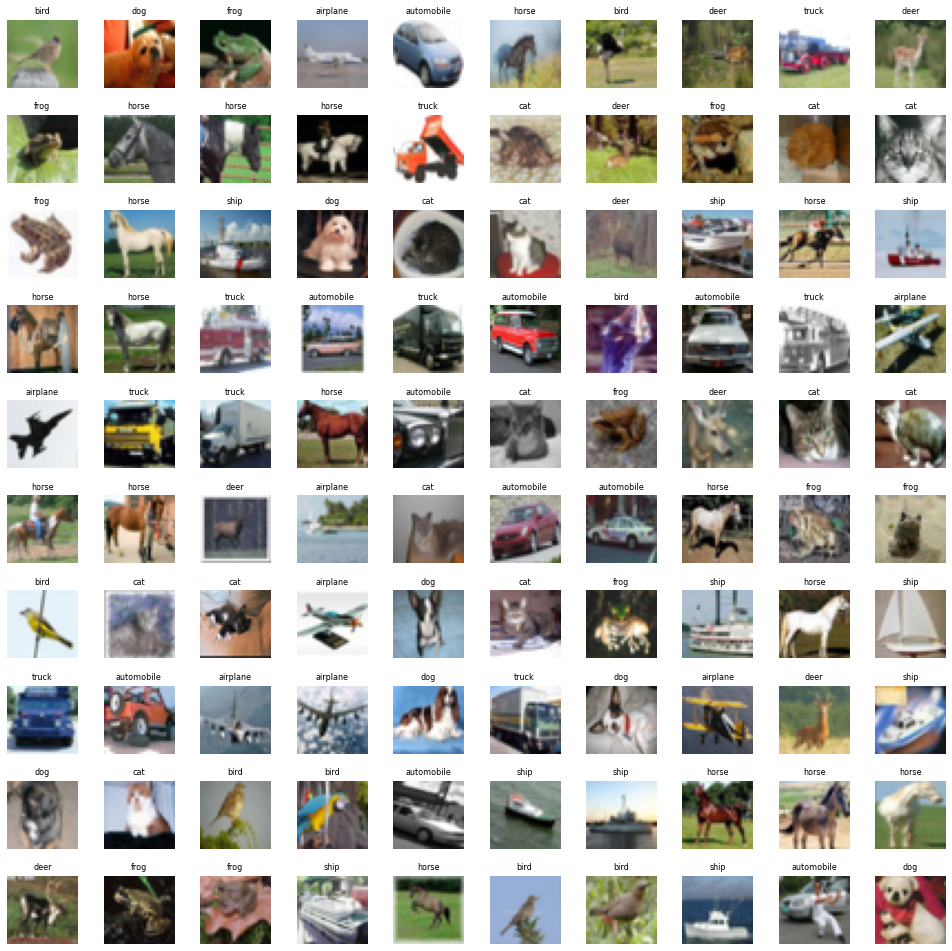

In [11]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel() 

n_train = len(X_train) 


for i in np.arange(0, W_grid * L_grid): 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


Text(0.5, 1.0, 'Class distribution in training set')

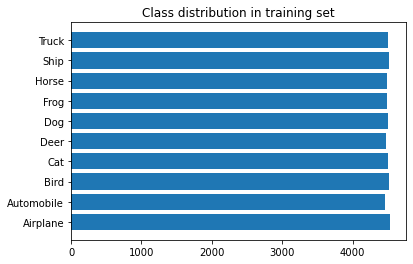

In [12]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in testing set')

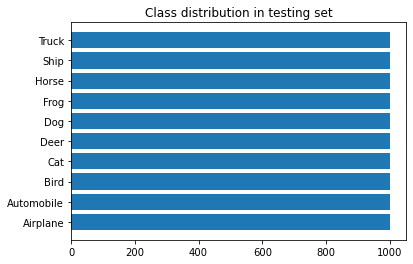

In [13]:
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in testing set')

In [14]:
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')
X_valid = X_valid.astype('float32')

mean = np.mean(X_train)
std  = np.std(X_train)

X_train = (X_train-mean)/(std+1e-7)
X_test  = (X_test-mean) /(std+1e-7)
X_valid = (X_valid-mean)/(std+1e-7)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

y_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [15]:
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model1 = Sequential()

weight_decay = 0.001


model1.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay), 
                 input_shape=X_train.shape[1:]))
model1.add(BatchNormalization())


model1.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(rate=0.2))


model1.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))   
model1.add(BatchNormalization())

model1.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(rate=0.3))


model1.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay))) 
model1.add(BatchNormalization())


model1.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(rate=0.4))


model1.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay))) 
model1.add(BatchNormalization())


model1.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(rate=0.5))


model1.add(Flatten())
model1.add(Dropout(0.2))
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.25))
model1.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.FalsePositives(name='false_positives')
]
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)


model1.summary()

C:\Users\anirb\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,308,586 (4.99 MB)

 Trainable params: 1,306,666 (4.98 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [16]:
early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True, verbose=1)

In [17]:
batch_size = 64
data_generator = ImageDataGenerator(
    # Rotate images randomly by up to 15 degrees
    rotation_range=15,
    
    # Shift images horizontally by up to 12% of their width
    width_shift_range=0.12,
    
    # Shift images vertically by up to 12% of their height
    height_shift_range=0.12,
    
    # Randomly flip images horizontally
    horizontal_flip=True,
    
    # Zoom images in by up to 10%
    zoom_range=0.1,
    
    # Change brightness by up to 10%
    brightness_range=[0.9,1.1],

    # Shear intensity (shear angle in counter-clockwise direction in degrees)
    shear_range=10,
    
    # Channel shift intensity
    channel_shift_range=0.1,
)

train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

r1 = model1.fit(train_generator, 
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_test),
              callbacks=[early_stopping],
             )

Epoch 1/50


C:\Users\anirb\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


703/703 ━━━━━━━━━━━━━━━━━━━━ 120s 162ms/step - accuracy: 0.2478 - false_positives: 1834.5199 - loss: 3.0643 - precision: 0.3715 - recall: 0.0552 - val_accuracy: 0.4346 - val_false_positives: 2349.0000 - val_loss: 2.3701 - val_precision: 0.5626 - val_recall: 0.3021
Epoch 2/50
  1/703 ━━━━━━━━━━━━━━━━━━━━ 1:50 157ms/step - accuracy: 0.5469 - false_positives: 7.0000 - loss: 2.0828 - precision: 0.7083 - recall: 0.2656

C:\Users\anirb\anaconda3\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


703/703 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5469 - false_positives: 7.0000 - loss: 2.0828 - precision: 0.7083 - recall: 0.2656 - val_accuracy: 0.4339 - val_false_positives: 2445.0000 - val_loss: 2.3737 - val_precision: 0.5558 - val_recall: 0.3059
Epoch 3/50
703/703 ━━━━━━━━━━━━━━━━━━━━ 114s 162ms/step - accuracy: 0.4364 - false_positives: 2767.7998 - loss: 2.2242 - precision: 0.6294 - recall: 0.2075 - val_accuracy: 0.5182 - val_false_positives: 2117.0000 - val_loss: 1.9178 - val_precision: 0.6568 - val_recall: 0.4051
Epoch 4/50
703/703 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4844 - false_positives: 11.0000 - loss: 1.8025 - precision: 0.6667 - recall: 0.3438 - val_accuracy: 0.5196 - val_false_positives: 2148.0000 - val_loss: 1.9016 - val_precision: 0.6536 - val_recall: 0.4053
Epoch 5/50
703/703 ━━━━━━━━━━━━━━━━━━━━ 114s 161ms/step - accuracy: 0.5197 - false_positives: 3233.5454 - loss: 1.8563 - precision: 0.6922 - recall: 0.3280 - val_accuracy: 0.6069 - val_false_posit

Epoch 29/50
703/703 ━━━━━━━━━━━━━━━━━━━━ 114s 161ms/step - accuracy: 0.7129 - false_positives: 3227.9006 - loss: 1.3532 - precision: 0.8102 - recall: 0.6181 - val_accuracy: 0.7499 - val_false_positives: 1408.0000 - val_loss: 1.2275 - val_precision: 0.8284 - val_recall: 0.6798
Epoch 30/50
703/703 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6875 - false_positives: 13.0000 - loss: 1.4747 - precision: 0.7234 - recall: 0.5312 - val_accuracy: 0.7473 - val_false_positives: 1435.0000 - val_loss: 1.2370 - val_precision: 0.8254 - val_recall: 0.6785
Epoch 31/50
703/703 ━━━━━━━━━━━━━━━━━━━━ 113s 161ms/step - accuracy: 0.7251 - false_positives: 3182.3069 - loss: 1.3037 - precision: 0.8188 - recall: 0.6343 - val_accuracy: 0.7536 - val_false_positives: 1591.0000 - val_loss: 1.2038 - val_precision: 0.8144 - val_recall: 0.6983
Epoch 32/50
703/703 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6250 - false_positives: 10.0000 - loss: 1.3838 - precision: 0.7826 - recall: 0.5625 - val_accuracy: 0.7555 -

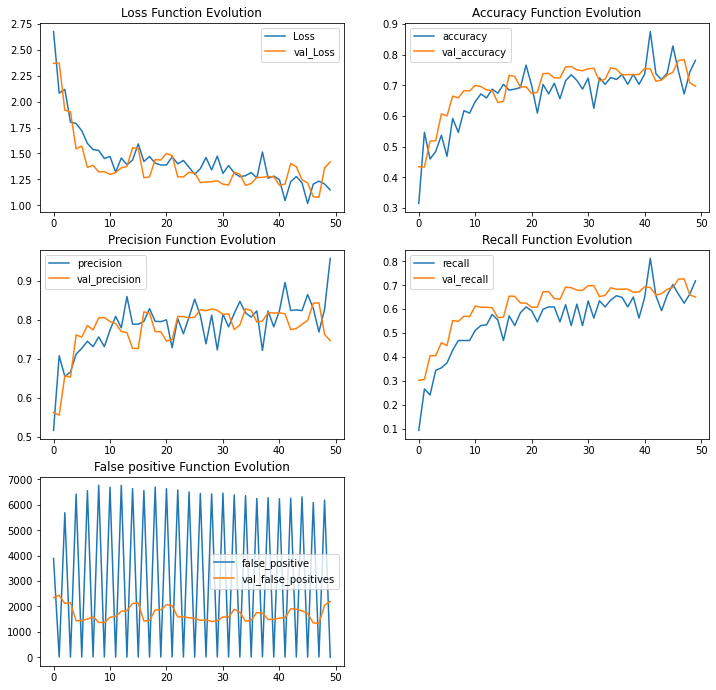

In [18]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r1.history['loss'], label='Loss')
plt.plot(r1.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r1.history['accuracy'], label='accuracy')
plt.plot(r1.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r1.history['precision'], label='precision')
plt.plot(r1.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r1.history['recall'], label='recall')
plt.plot(r1.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

plt.subplot(4, 2, 5)
plt.plot(r1.history['false_positives'], label='false_positive')
plt.plot(r1.history['val_false_positives'], label='val_false_positives')
plt.title('False positive Function Evolution')
plt.legend()

In [26]:
evaluation = model1.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

y_pred = model1.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7853 - false_positives: 678.5955 - loss: 1.0755 - precision: 0.8447 - recall: 0.7279
Test Accuracy : 78.34%
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 Image 1000 is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The model predict that image 1000 is 5


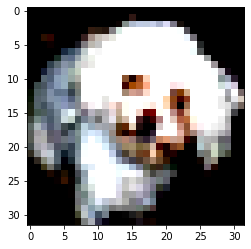

In [28]:
my_image = X_test[1000]
plt.imshow(my_image)

# that's a dog
print(f" Image 1000 is {y_test[1000]}")

# correctly predicted as a dog
pred_1000 = np.argmax(model1.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image 1000 is {pred_1000}")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

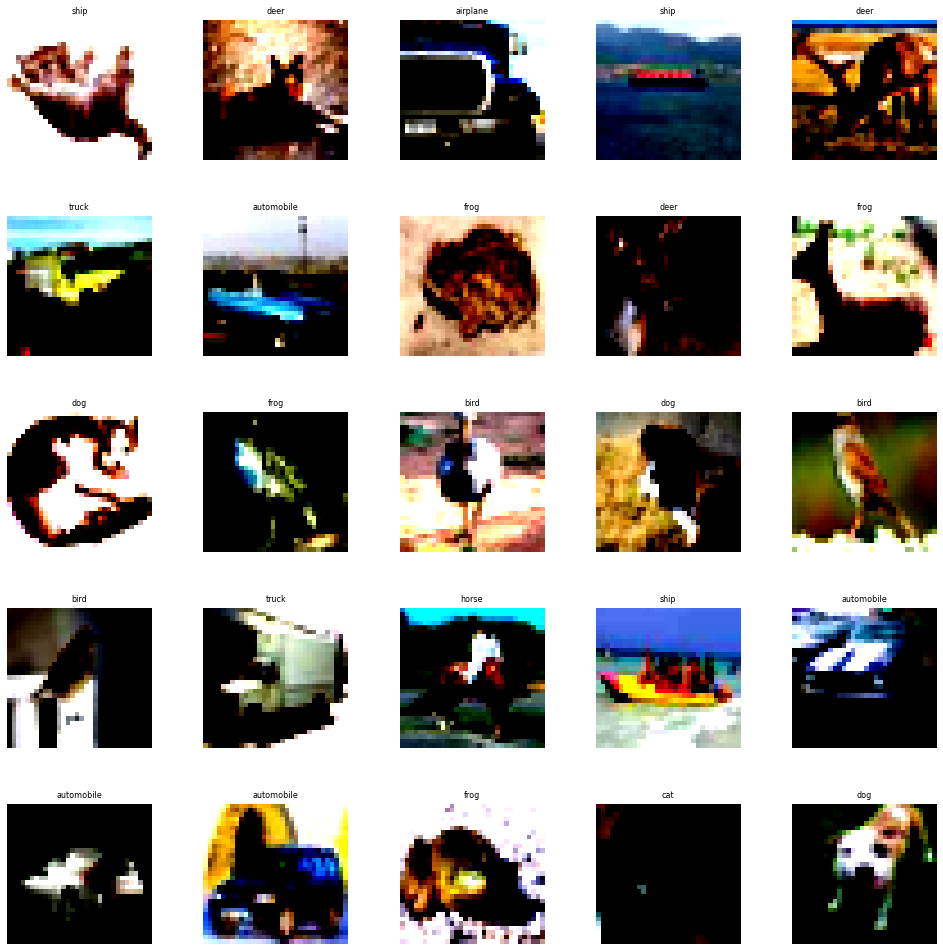

In [29]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_test = len(X_test) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_test)
    # read and display an image with the selected index    
    axes[i].imshow(X_test[index,1:])
    label_index = int(y_pred[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [30]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})", 
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

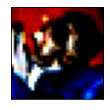

In [31]:
predictions = model1.predict(X_test)

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

In [39]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

batch_size = 32
data_generator = ImageDataGenerator(
    # Rotate images randomly by up to 15 degrees
    rotation_range=15,
    
    # Shift images horizontally by up to 12% of their width
    width_shift_range=0.12,
    
    # Shift images vertically by up to 12% of their height
    height_shift_range=0.12,
    
    # Randomly flip images horizontally
    horizontal_flip=True,
    
    # Zoom images in by up to 10%
    zoom_range=0.1,
    
    # Change brightness by up to 10%
    brightness_range=[0.9,1.1],

    # Shear intensity (shear angle in counter-clockwise direction in degrees)
    shear_range=10,
    
    # Channel shift intensity
    channel_shift_range=0.1,
)

train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True, verbose=1)

model2 = Sequential()
base_model = MobileNetV2(input_shape=(32, 32, 3), include_top=False, weights='imagenet', pooling='avg')
model2.add(base_model)
model2.add(Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',
                                                                           tf.keras.metrics.Precision(name='precision'),
                                                                           tf.keras.metrics.Recall(name='recall'),
                                                                           tf.keras.metrics.FalsePositives(name='false_positives')])

r2 = model2.fit(train_generator, 
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_test),
              callbacks=[early_stopping]
             )

C:\Users\anirb\AppData\Local\Temp\ipykernel_8800\681473905.py:38: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(32, 32, 3), include_top=False, weights='imagenet', pooling='avg')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 17s 2us/step
Epoch 1/50
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 216s 139ms/step - accuracy: 0.3286 - false_positives: 2554.5630 - loss: 2.0081 - precision: 0.4799 - recall: 0.1079 - val_accuracy: 0.0975 - val_false_positives: 8892.0000 - val_loss: 6.3216 - val_precision: 0.0987 - val_recall: 0.0974
Epoch 2/50
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2500 - false_positives: 0.0000e+00 - loss: 1.8989 - precision: 1.0000 - recall: 0.0625 - val_accuracy: 0.0970 - val_false_positives: 8849.0000 - val_loss: 6.8028 - val_precision: 0.0984 - val_recall: 0.0966
Epoch 3/50
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 201s 143ms/step - accuracy: 0.2922 - false_positives: 1310.9829 - loss: 2.0159 - precision: 0.4318 - recall: 0.0432 - val_accuracy: 0.1001 - val_false_positives: 8291.0000 - val_loss: 3.9496 - val_precision: 0.1011 - val_recall: 0.0933
Epoch 4/50
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1250 - false_positives: 2.0000 - loss: 2.6782 - pre

1406/1406 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3125 - false_positives: 1.0000 - loss: 1.6796 - precision: 0.6667 - recall: 0.0625 - val_accuracy: 0.1336 - val_false_positives: 5030.0000 - val_loss: 3.2052 - val_precision: 0.1867 - val_recall: 0.1155
Epoch 27/50
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 228s 162ms/step - accuracy: 0.2918 - false_positives: 850.9012 - loss: 1.9442 - precision: 0.4242 - recall: 0.0282 - val_accuracy: 0.1864 - val_false_positives: 1.0000 - val_loss: 2.3151 - val_precision: 0.8000 - val_recall: 4.0000e-04
Epoch 28/50
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.2812 - false_positives: 0.0000e+00 - loss: 1.8675 - precision: 1.0000 - recall: 0.0312 - val_accuracy: 0.1863 - val_false_positives: 8.0000 - val_loss: 2.3275 - val_precision: 0.3333 - val_recall: 4.0000e-04
Epoch 29/50
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 297s 211ms/step - accuracy: 0.2649 - false_positives: 651.8436 - loss: 2.0653 - precision: 0.3583 - recall: 0.0172 - val_accuracy: 0.1635 - 

In [42]:
#Swappy check the performance of model 2 as well

evaluation = model2.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')



313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.3322 - false_positives: 680.8248 - loss: 1.7716 - precision: 0.4654 - recall: 0.1136
Test Accuracy : 32.39%


 Image 100 is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
The model predict that image 100 is 6


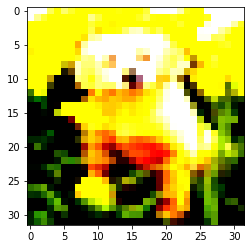

In [44]:
my_image = X_test[190]
plt.imshow(my_image)

# that's a Deer
print(f" Image 100 is {y_test[190]}")

# correctly predicted as a Deer
pred_102 = np.argmax(model2.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image 100 is {pred_102}")

In [33]:
from tensorflow.keras.models import load_model
#save either one model whichever gives the better output
model1.save('model_1.h5')

In [40]:
pip install streamlit-jupyter-widget

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement streamlit-jupyter-widget (from versions: none)
ERROR: No matching distribution found for streamlit-jupyter-widget


In [45]:
%reload_ext streamlit

TypeError: Descriptors cannot be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates